In [1]:
# A comparison of head size and brain weight

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# Reading data
print("Reading the csv file and looking at the first five rows :\n")
data = pd.read_csv("headbrain.csv")
print(data.head())

Reading the csv file and looking at the first five rows :

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [3]:
# Preprocessing data 
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [4]:
# Preprocessing: Checking for null values
data.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [5]:
# Data cleanup required?
# No null values, data is numerical, what about outliers?
print('Normalize data by looking for and removing outliers')

Normalize data by looking for and removing outliers


array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age Range'}>],
       [<AxesSubplot:title={'center':'Head Size(cm^3)'}>,
        <AxesSubplot:title={'center':'Brain Weight(grams)'}>]],
      dtype=object)

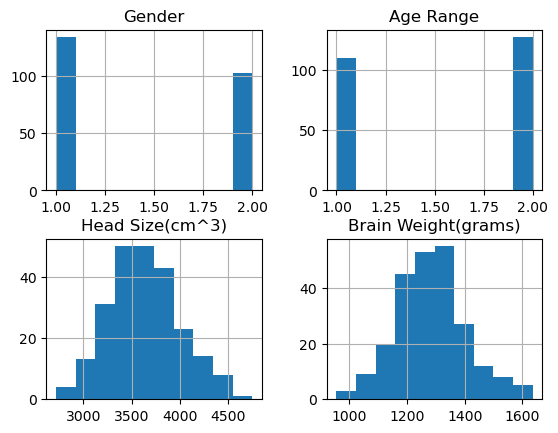

In [6]:
# Interesting Analyses: Outlier detection by histogram
data.hist()

In [7]:
print("Head size is smaller in females,")
print("and the brain weighs more as people age.")
print("Head size and brain weight show normal distributions -")
print("...but what about outliers? The histograms appear")
print("to be normally distributed, so we will need another")
print("method. Let's try using the interquartile range")

Head size is smaller in females,
and the brain weighs more as people age.
Head size and brain weight show normal distributions -
...but what about outliers? The histograms appear
to be normally distributed, so we will need another
method. Let's try using the interquartile range


In [8]:
# Using IQR to detect outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                   1.0
Age Range                1.0
Head Size(cm^3)        487.0
Brain Weight(grams)    143.0
dtype: float64


In [9]:
# Removing outliers with IQR scores
data_removed = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [10]:
# Examining whether data was removed
data_removed.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,231.000000,231.000000,231.000000,231.000000
mean,1.441558,1.536797,3625.549784,1277.415584
std,0.497651,0.499727,351.268293,110.252873
min,1.000000,1.000000,2773.000000,1012.000000
25%,1.000000,1.000000,3386.000000,1206.000000
50%,1.000000,2.000000,3609.000000,1280.000000
75%,2.000000,2.000000,3860.500000,1350.000000
max,2.000000,2.000000,4512.000000,1560.000000


In [11]:
# Comparing with the original dataset, 6 records are deleted by using the IQR method
data.describe()
print('6 records are deleted')

6 records are deleted


Notice that the scale of the two normal distributions has
changed as outliers have been removed.


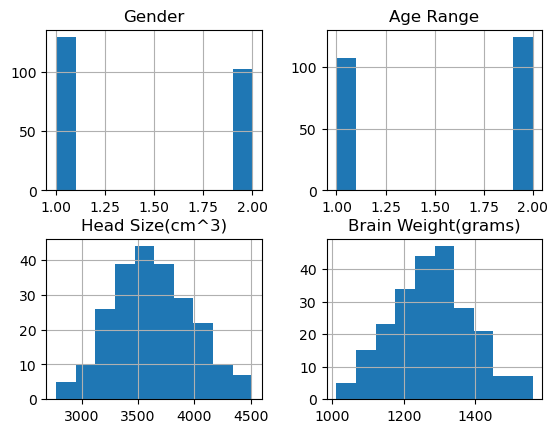

In [12]:
data_removed.hist()
print("Notice that the scale of the two normal distributions has") 
print("changed as outliers have been removed.")

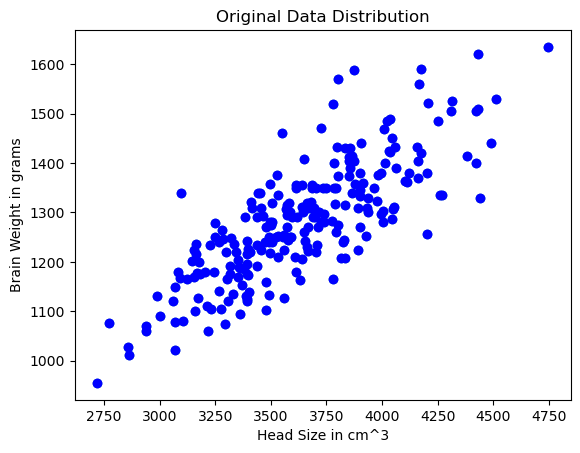

In [13]:
# Linear regression: First, I will plot the data points of the original dataset:
X = data['Head Size(cm^3)'].values
Y =  data['Brain Weight(grams)'].values
plt.title('Original Data Distribution')
plt.scatter(X,Y)
plt.xlabel('Head Size in cm^3')
plt.ylabel('Brain Weight in grams')
plt.scatter(X, Y, c='blue', label='Scatter Plot')

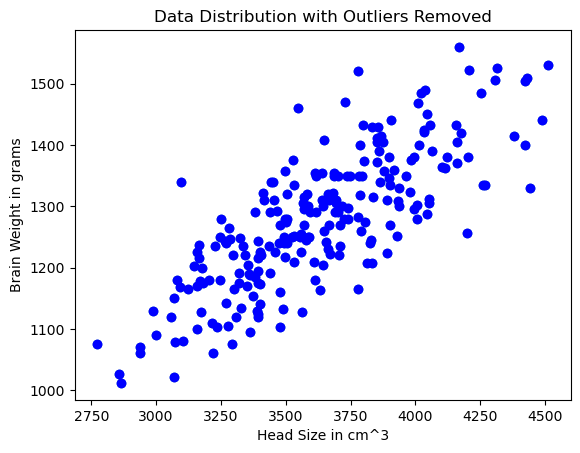

In [14]:
# Linear regression: Comparing with outliers removed *these are the values we will continue working with
X = data_removed['Head Size(cm^3)'].values
Y =  data_removed['Brain Weight(grams)'].values
plt.title('Data Distribution with Outliers Removed')
plt.scatter(X,Y)
plt.xlabel('Head Size in cm^3')
plt.ylabel('Brain Weight in grams')
plt.scatter(X, Y, c='blue', label='Scatter Plot')

In [15]:
# Linear regression: Finding the values of m and c
# First, we find the mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Next we find the total number of values
n = len(X)
 
# Calculating m and c using a formula
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
 
# Print coefficients
print(m, c)

0.24786691328022575 378.7617506233089


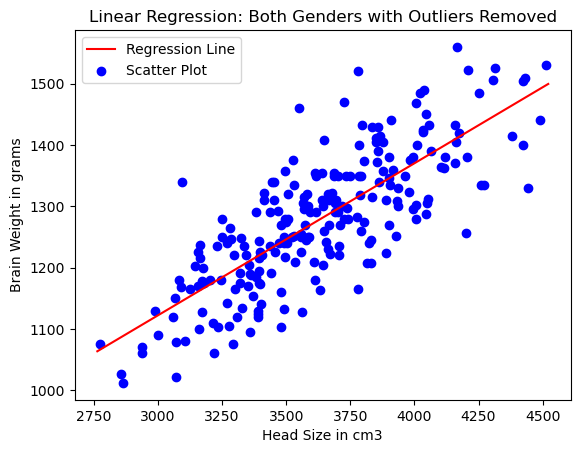

In [16]:
# Plotting Values and Regression Line
max_x = np.max(X) + 10
min_x = np.min(X) - 10
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x 
 
# Plotting Line
plt.plot(x, y, color='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='blue', label='Scatter Plot')
plt.title('Linear Regression: Both Genders with Outliers Removed')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [17]:
#Insights
#here, I plotted head size against brain weight and used linear regression to see if there was a relationship between the two variables
#The straight line allows us to predict tHe dependent variable if we know the independent variable's value

In [18]:
# Examining differences in Male and Female head size and brain weight

In [19]:
# Reading male data
print("Reading the male csv file and looking at the first five rows :\n")
dataM = pd.read_csv("headbrain_G1.csv")
print(dataM.head())

Reading the male csv file and looking at the first five rows :

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [20]:
dataM.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,134.0,134.000000,134.000000,134.000000
mean,1.0,1.574627,3798.261194,1331.858209
std,0.0,0.496255,327.764883,108.933390
min,1.0,1.000000,3095.000000,1120.000000
25%,1.0,1.000000,3538.500000,1252.750000
50%,1.0,2.000000,3794.500000,1313.500000
75%,1.0,2.000000,4029.500000,1400.000000
max,1.0,2.000000,4747.000000,1635.000000


In [21]:
# Using IQR to detect outliers in male data
Q1M = dataM.quantile(0.25)
Q3M = dataM.quantile(0.75)
IQRM = Q3M - Q1M
print(IQR)

Gender                   1.0
Age Range                1.0
Head Size(cm^3)        487.0
Brain Weight(grams)    143.0
dtype: float64


In [22]:
# Removing outliers with IQR scores
data_M_removed = dataM[~((dataM < (Q1M - 1.5 * IQRM)) |(dataM > (Q3M + 1.5 * IQRM))).any(axis=1)]


0.23179189021412558 450.82626403183156


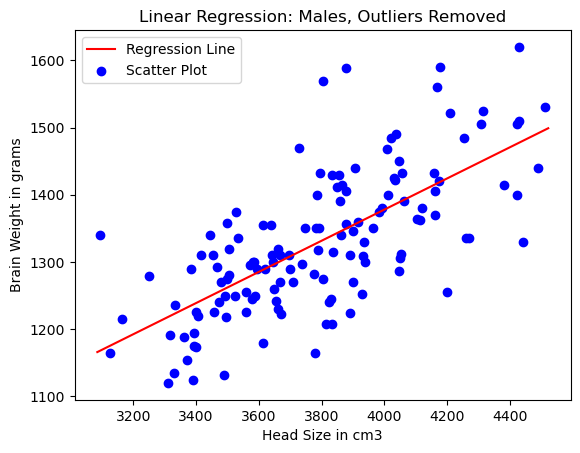

In [23]:
# Linear regression in male data: 
X = data_M_removed['Head Size(cm^3)'].values
Y =  data_M_removed['Brain Weight(grams)'].values

# Linear regression: Finding the values of m and c
# First, we find the mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Next we find the total number of values
n = len(X)
 
# Calculating m and c using a formula
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
 
# Print coefficients
print(m, c)

# Plotting Values and Regression Line
max_x = np.max(X) + 10
min_x = np.min(X) - 10
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x 
 
# Plotting Line
plt.plot(x, y, color='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='blue', label='Scatter Plot')
plt.title('Linear Regression: Males, Outliers Removed')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [24]:
# Reading female data
print("Reading the female csv file and looking at the first five rows :\n")
dataF = pd.read_csv("headbrain_G2.csv")
print(dataF.head())

Reading the female csv file and looking at the first five rows :

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       2          1             2857                 1027
1       2          1             3436                 1235
2       2          1             3791                 1260
3       2          1             3302                 1165
4       2          1             3104                 1080


In [25]:
dataF.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,103.0,103.000000,103.000000,103.000000
mean,2.0,1.485437,3420.281553,1219.145631
std,0.0,0.502232,295.021615,103.829933
min,2.0,1.000000,2720.000000,955.000000
25%,2.0,1.000000,3216.000000,1146.000000
50%,2.0,1.000000,3394.000000,1220.000000
75%,2.0,2.000000,3637.000000,1290.000000
max,2.0,2.000000,4204.000000,1520.000000


In [26]:
# Using IQR to detect outliers in female data
Q1F = dataF.quantile(0.25)
Q3F = dataF.quantile(0.75)
IQRF = Q3F - Q1F
print(IQRF)

Gender                   0.0
Age Range                1.0
Head Size(cm^3)        421.0
Brain Weight(grams)    144.0
dtype: float64


In [27]:
# Removing outliers with IQR scores 
data_F_removed = dataF[~((dataF < (Q1F - 1.5 * IQRF)) |(dataF > (Q3F + 1.5 * IQRF))).any(axis=1)]


0.27280169736173243 286.087017845948


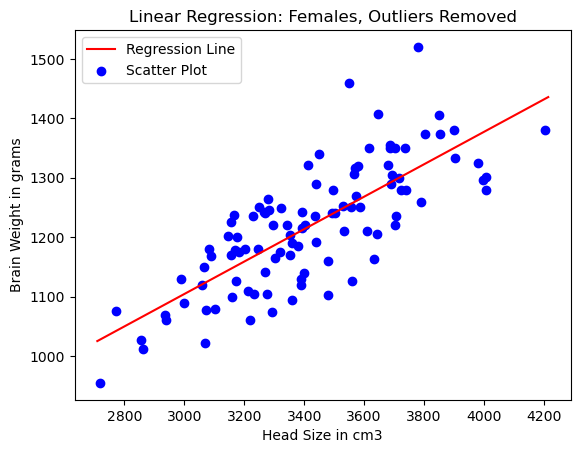

In [28]:
# Linear regression in female data: 
X = dataF['Head Size(cm^3)'].values
Y =  dataF['Brain Weight(grams)'].values

# Linear regression: Finding the values of m and c
# First, we find the mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Next we find the total number of values
n = len(X)
 
# Calculating m and c using a formula
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
 
# Print coefficients
print(m, c)

# Plotting Values and Regression Line
max_x = np.max(X) + 10
min_x = np.min(X) - 10
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x 
 
# Plotting Line
plt.plot(x, y, color='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='blue', label='Scatter Plot')
plt.title('Linear Regression: Females, Outliers Removed')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()